In [1]:
# I am using a chi test/f_regression to try to select the best categeorical and numerical features, then I will compare them to 
# my cherry picked columns from doing a correlation visualization

In [480]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import models as model

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_regression

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import SimpleImputer

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import set_config

In [3]:
df_train_raw = pd.read_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-2-master/datasets/train.csv')

df = df_train_raw.copy()

In [4]:
# This will use the entire dataset
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [ ]:
# Set up the common X_train and y_train

In [5]:
df_objects = df.loc[:, df.dtypes == object]

In [6]:
ms = model.ModelSelection(df_objects,y)

In [ ]:
# Set up the aspects of the KBestFeatures Categeorical Pipeline

In [7]:
si = SimpleImputer(strategy='constant', fill_value='other')

In [8]:
ohe = OneHotEncoder(sparse=False)

In [18]:
kb = SelectKBest(score_func=chi2, k='all')

In [ ]:
# Inspect the columns and then compare to the output of OHE

In [359]:
pd.DataFrame(enumerate(df_objects.columns))

,0,1
0,0,MS Zoning
1,1,Street
2,2,Alley
3,3,Lot Shape
4,4,Land Contour
5,5,Utilities
6,6,Lot Config
7,7,Land Slope
8,8,Neighborhood
9,9,Condition 1


In [586]:
df_objects.iloc[35]

MS Zoning              RL
Street               Pave
Alley                 NaN
Lot Shape             IR1
Land Contour          HLS
Utilities          AllPub
Lot Config         Inside
Land Slope            Mod
Neighborhood        NAmes
Condition 1          Norm
Condition 2          Norm
Bldg Type            1Fam
House Style        1Story
Roof Style           Flat
Roof Matl         Tar&Grv
Exterior 1st      Wd Sdng
Exterior 2nd      Wd Sdng
Mas Vnr Type      BrkFace
Exter Qual             TA
Exter Cond             TA
Foundation         CBlock
Bsmt Qual              Gd
Bsmt Cond              TA
Bsmt Exposure          Gd
BsmtFin Type 1        Unf
BsmtFin Type 2        Unf
Heating              GasA
Heating QC             Fa
Central Air             Y
Electrical          SBrkr
Kitchen Qual           TA
Functional            Typ
Fireplace Qu           Gd
Garage Type       Basment
Garage Finish         RFn
Garage Qual            TA
Garage Cond            TA
Paved Drive             Y
Pool QC     

In [15]:
X_train_si = si.fit_transform(ms.X_train)

In [19]:
X_train_ohe = ohe.fit_transform(X_train_si)

In [21]:
X_train_ohe[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [190]:
columns = ohe.get_feature_names()

In [585]:
list(columns)

['x0_A (agr)',
 'x0_C (all)',
 'x0_FV',
 'x0_I (all)',
 'x0_RH',
 'x0_RL',
 'x0_RM',
 'x1_Grvl',
 'x1_Pave',
 'x2_Grvl',
 'x2_Pave',
 'x2_other',
 'x3_IR1',
 'x3_IR2',
 'x3_IR3',
 'x3_Reg',
 'x4_Bnk',
 'x4_HLS',
 'x4_Low',
 'x4_Lvl',
 'x5_AllPub',
 'x5_NoSeWa',
 'x5_NoSewr',
 'x6_Corner',
 'x6_CulDSac',
 'x6_FR2',
 'x6_FR3',
 'x6_Inside',
 'x7_Gtl',
 'x7_Mod',
 'x7_Sev',
 'x8_Blmngtn',
 'x8_Blueste',
 'x8_BrDale',
 'x8_BrkSide',
 'x8_ClearCr',
 'x8_CollgCr',
 'x8_Crawfor',
 'x8_Edwards',
 'x8_Gilbert',
 'x8_Greens',
 'x8_GrnHill',
 'x8_IDOTRR',
 'x8_MeadowV',
 'x8_Mitchel',
 'x8_NAmes',
 'x8_NPkVill',
 'x8_NWAmes',
 'x8_NoRidge',
 'x8_NridgHt',
 'x8_OldTown',
 'x8_SWISU',
 'x8_Sawyer',
 'x8_SawyerW',
 'x8_Somerst',
 'x8_StoneBr',
 'x8_Timber',
 'x8_Veenker',
 'x9_Artery',
 'x9_Feedr',
 'x9_Norm',
 'x9_PosA',
 'x9_PosN',
 'x9_RRAe',
 'x9_RRAn',
 'x9_RRNe',
 'x9_RRNn',
 'x10_Artery',
 'x10_Feedr',
 'x10_Norm',
 'x10_PosN',
 'x10_RRAe',
 'x10_RRAn',
 'x10_RRNn',
 'x11_1Fam',
 'x11_2fmCon'

In [ ]:
# fit

In [30]:
kb.fit_transform(X=X_train_ohe, y=ms.y_train, )

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [184]:
# https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work
# The source to convert p values to score is here
scores = -np.log10(kb.pvalues_)

In [47]:
len(scores)

263

In [48]:
len(columns)

263

In [ ]:
# Visualize the standardized scores of each column with respect to SalePrice

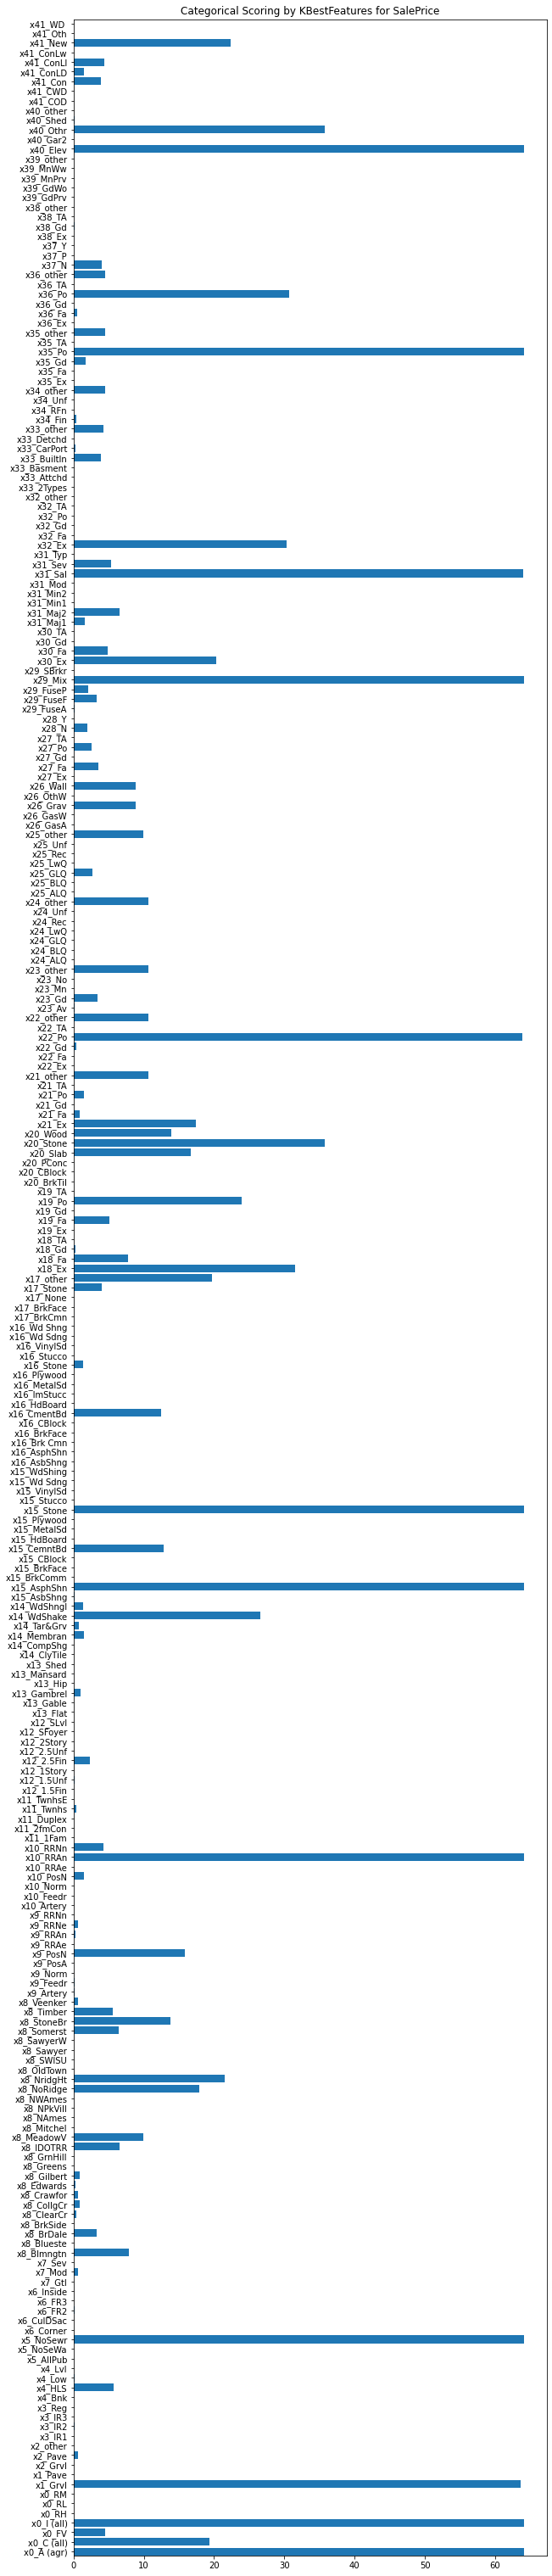

In [97]:
plt.figure(figsize=(10,55))
plt.barh(range(len(columns)), scores)
plt.yticks(range(len(columns)), columns, rotation='horizontal')
plt.title('Categorical Scoring by KBestFeatures for SalePrice')
plt.margins(y=0, tight=True)
plt.savefig(
    '/home/blue/general-assembly/dsir-824/submissions/projects/project-2-master/images/kbestfeatures.png',
    transparent=False,
    bbox_inches='tight',
    pad_inches=0,
    
)

In [ ]:
# Looking at the plot of KBestFeatures vs Features, we have now identified a threshold of a score

# I want all categeorical featurees > 20, let's go ahead and refine our plot

In [195]:
knn_score = pd.DataFrame(scores, index=columns, columns=['pscore'])

In [215]:
knn_score_filtered = knn_score[knn_score > 20].dropna().sort_values(by='pscore', ascending=False)

In [295]:
knn_score_filtered = knn_score_filtered.reset_index()

In [303]:
knn_score_filtered

,index,pscore
0,x0_A (agr),64.123213
1,x5_NoSewr,64.123213
2,x0_I (all),64.123213
3,x35_Po,64.123213
4,x15_AsphShn,64.123213
5,x29_Mix,64.123213
6,x10_RRAn,64.123213
7,x40_Elev,64.123213
8,x15_Stone,64.123213
9,x31_Sal,64.004337


In [ ]:
# This gives me a good upper bound for defining where I want to go with my model gridsearch cv hyperparameters

In [425]:
df_columns = pd.DataFrame(df_objects.columns, columns=['name'])

In [453]:
df_columns.iloc[0].values[0]

'MS Zoning'

In [436]:
import re
# Use a dict comprenhension to extract the number from the selected OHE column names
numbers = [int(re.findall(r'\d+', i)[0])for i in knn_score_filtered['index']]

In [582]:
# Convert The Extracted OHE columns to the parent columns for a graph
extracted_columns = [df_columns.iloc[i].values[0] for i in numbers]
extracted_columns

['MS Zoning',
 'Utilities',
 'MS Zoning',
 'Garage Qual',
 'Exterior 1st',
 'Electrical',
 'Condition 2',
 'Misc Feature',
 'Exterior 1st',
 'Functional',
 'Bsmt Cond',
 'Street',
 'Foundation',
 'Misc Feature',
 'Exter Qual',
 'Garage Cond',
 'Fireplace Qu',
 'Roof Matl',
 'Exter Cond',
 'Sale Type',
 'Neighborhood',
 'Kitchen Qual']

In [583]:
# Create a plot of the top 22 Qualitative Features

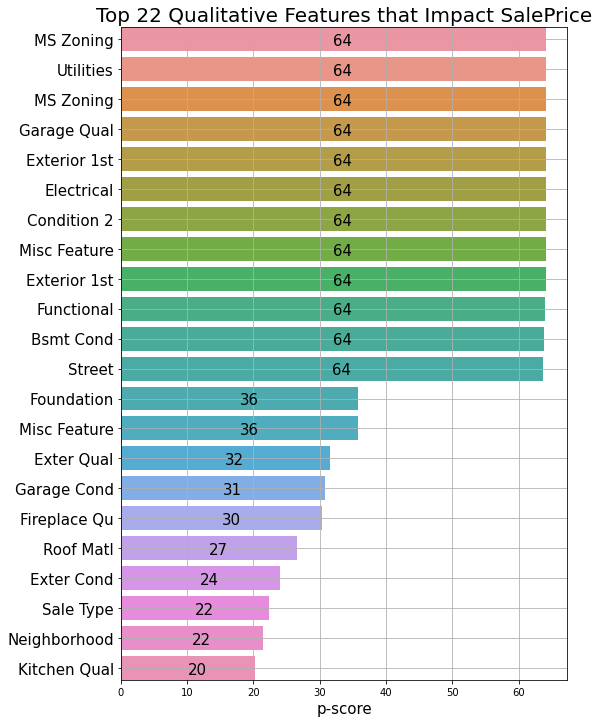

In [584]:
plt.figure(figsize=(8,12))
#plt.barh(range(len(extracted_columns)), knn_score_filtered['pscore'][::-1])
sns.barplot(data=knn_score_filtered[['pscore']].T, orient='horizontal')
plt.yticks(range(len(extracted_columns)), extracted_columns, rotation='horizontal', fontsize=15)
plt.xlabel('p-score', fontsize=15)
plt.title('Top 22 Qualitative Features that Impact SalePrice', fontsize=20)
plt.grid()
plt.margins(y=0, tight=True)

for index, value in enumerate([i for i in knn_score_filtered['pscore']]):
    plt.text(value/2, index+0.2, str(round(value)), fontsize=15)
plt.savefig(
    '/home/blue/general-assembly/dsir-824/submissions/projects/project-2-master/images/qual-top20.png',
    transparent=False,
    bbox_inches='tight',
    pad_inches=0.2,)

In [98]:
# Numerical Scoring via KBest features using f_score, let's take a look and see if my correlation
# assumptions were correct!

In [ ]:
# set up numerical pipeline elements
# Use default numerical f_classif to identify if the column has any significance to SalePrice

In [148]:
si_num = SimpleImputer(missing_values=np.nan, strategy='mean')
ss_num = StandardScaler()
kb_num = SelectKBest(k='all')

In [161]:
df_nums = df.loc[:, df.dtypes != object].drop('SalePrice', axis=1)

In [162]:
my = model.ModelSelection(df_nums,y)

In [163]:
X_nums_si = si_num.fit_transform(my.X_train)

In [164]:
X_nums_ss = ss_num.fit_transform(X_nums_si)

In [171]:
columns_num = list(my.X_train.columns)

In [173]:
columns_num

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

In [174]:
kb_num.fit_transform(X_nums_ss, my.y_train)

array([[ 1.14116299, -0.97215557,  0.06699017, ..., -0.10498392,
         0.26977393, -1.36171656],
       [ 1.26347278, -0.94048136,  0.06699017, ...,  0.83933028,
        -0.0974051 , -1.36171656],
       [ 1.17559973, -0.97102043, -0.86017192, ..., -0.10498392,
         1.00413198, -1.36171656],
       ...,
       [ 1.29315962, -0.93913469, -0.86017192, ..., -0.10498392,
        -0.0974051 , -1.36171656],
       [-1.58765155, -0.93902233,  0.53057122, ..., -0.10498392,
        -1.19894218,  1.70015488],
       [ 1.34659594, -0.93422201, -0.16480035, ..., -0.10498392,
        -1.93330024, -1.36171656]])

In [175]:
scores_num = -np.log10(kb_num.pvalues_)

In [176]:
len(columns_num)

38

In [177]:
len(scores_num)

38

In [ ]:
# Visualize

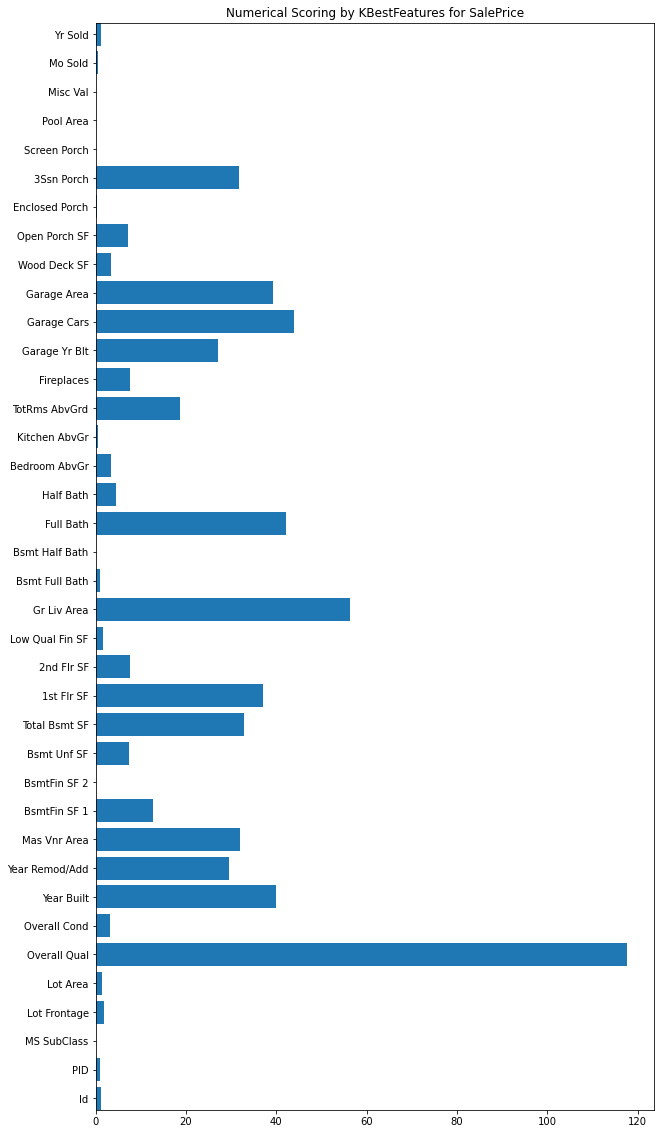

In [183]:
plt.figure(figsize=(10,20))
plt.barh(range(len(columns_num)), scores_num)
plt.yticks(range(len(columns_num)), columns_num, rotation='horizontal')
plt.title('Numerical Scoring by KBestFeatures for SalePrice')
plt.margins(y=0, tight=True)

#plt.savefig(
#    '/home/blue/general-assembly/dsir-824/submissions/projects/project-2-master/images/kbestfeatures-numerical.png',
#    transparent=False,
#    bbox_inches='tight',
#    pad_inches=0,
#    
#)

In [562]:
df_num_scores = pd.DataFrame(scores_num, index=columns_num, columns=['pscore'])

In [563]:
df_num_scores_top_12 = df_num_scores[df_num_scores > 20].dropna().sort_values(by='pscore', ascending=False)

In [564]:
df_num_scores_top_12_t = df_num_scores_top_12.T

In [565]:
df_num_scores_top_12

,pscore
Overall Qual,117.676044
Gr Liv Area,56.235738
Garage Cars,43.931788
Full Bath,42.142692
Year Built,39.983690
Garage Area,39.249891
1st Flr SF,37.120835
Total Bsmt SF,32.771298
Mas Vnr Area,32.002713
3Ssn Porch,31.809437


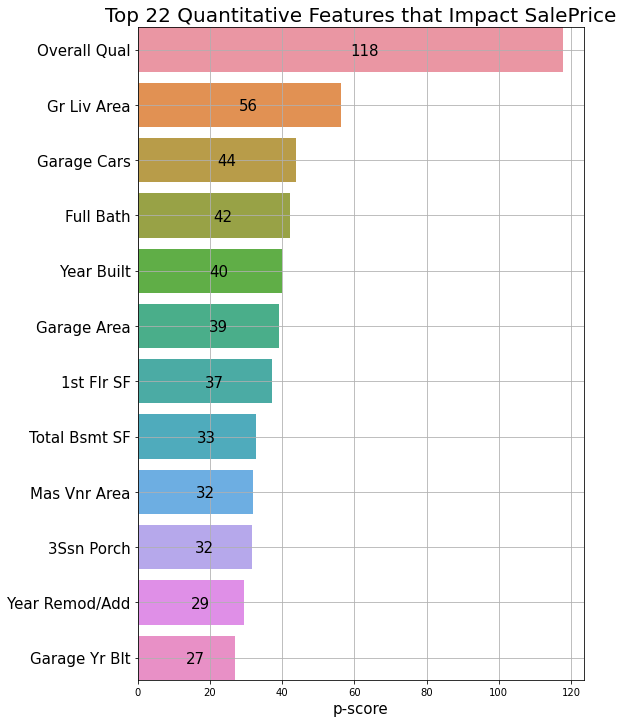

In [581]:
plt.figure(figsize=(8,12))
#plt.barh(range(len(extracted_columns)), knn_score_filtered['pscore'][::-1])
sns.barplot(data=df_num_scores_top_12.T, orient='horizontal')
plt.yticks(range(len(extracted_columns)), df_num_scores_top_12.T.columns, rotation='horizontal', fontsize=15)
plt.xlabel('p-score', fontsize=15)
plt.title('Top 22 Quantitative Features that Impact SalePrice', fontsize=20)
plt.grid()
plt.margins(y=0, tight=True)

for index, value in enumerate([i for i in df_num_scores_top_12['pscore']]):
    plt.text(value/2, index+0.1, str(round(value)), fontsize=15)
plt.savefig(
    '/home/blue/general-assembly/dsir-824/submissions/projects/project-2-master/images/quan-top22.png',
    transparent=False,
    bbox_inches='tight',
    pad_inches=0.2,)

In [ ]:
# This gives me another set of numbers to work with. I generally want to stick with the best features that correlate the most

# range for categeorical features: 1 - 21

# range for numerical features: 1 - 22

# We can then establish an optimized baseline and then see how our models preform